### Treinamento Kuzushiji-MNIST

In [7]:
import numpy as np
import pandas as pd
import idx2numpy
import tensorflow.keras as tk
import keras.datasets as ds
import keras
from keras import layers
from datetime import datetime

####  Número de classes padrão para o Kuzushiji-MNIST

In [8]:
num_classes = 10

#### Formato de entrada

In [9]:
input_shape = (28, 28, 1)

#### Raiz dos arquivos

In [10]:
path = 'C:/Users/Adema.DESKTOP-MKK2GAA/Desktop/Trabalho Final - Chamy/'

#### Csv do modelo

In [11]:
class_map = pd.read_csv(path + 'dataset_kmnist/kmnist_classmap.csv')

#### Todos os arquivos de treinamento e teste

In [12]:
# Todos os arquivos de treinamento e teste
train_folder = (path + 'dataset_kmnist/kmnist-train-imgs.npz')
train_labels_folder = (path + 'dataset_kmnist/kmnist-train-labels.npz')
test_folder = (path + 'dataset_kmnist/kmnist-test-imgs.npz')
test_labels_folder = (path + 'dataset_kmnist/kmnist-test-labels.npz')

#### Converter os arquivos .npz em arrays numpy

In [13]:
x_train = np.load(train_folder)['arr_0']
y_train = np.load(train_labels_folder)['arr_0']
x_test = np.load(test_folder)['arr_0']
y_test = np.load(test_labels_folder)['arr_0']

In [14]:
# Verificando os dados
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

#### Plotando as 9 primeiras imagens do modelo

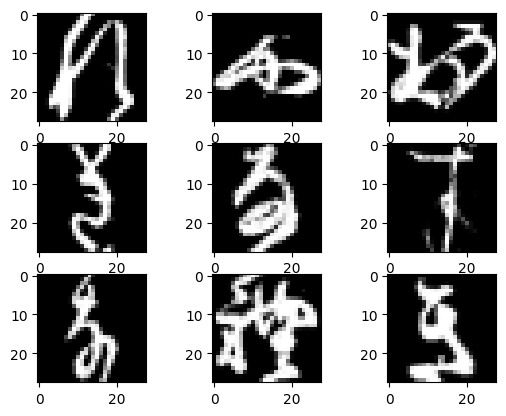

In [15]:
import matplotlib.pyplot as plt
for x in range(9):
    plt.subplot(330 + 1 + x)
    plt.imshow(x_train[x], cmap=plt.get_cmap('gray'))
plt.show()

#### Função para decodificar os rótulos do Kuzushiji-MNIST

In [16]:
def decode_kmnist_labels(labels_path, predictions):
    # Carrega o arquivo kmnist_classmap.csv
    class_map = pd.read_csv(labels_path)

    # Cria um dicionário de correspondência entre rótulos e caracteres
    label_dict = {}
    for i in range(len(class_map)):
        label_dict[i] = class_map.iloc[i]['char']

    # Decodifica os rótulos das previsões
    decoded_labels = []
    for pred in predictions:
        decoded_labels.append(label_dict[pred.argmax()])

    return decoded_labels

#### Convertendo a coluna 'index' do dataframe class_map em uma lista de inteiros:

In [17]:
labels = class_map['index'].tolist()

In [20]:
# Realiza as previsões do modelo
y_pred = model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [21]:
# Decodifica os rótulos das previsões
decoded_labels = decode_kmnist_labels(path + 'dataset_kmnist/kmnist_classmap.csv', y_pred)

In [22]:
# Exibe as previsões
for i in range(len(decoded_labels)):
    print('Imagem {}: {}'.format(i+1, decoded_labels[i]))

Imagem 1: ま
Imagem 2: お
Imagem 3: を
Imagem 4: お
Imagem 5: お
Imagem 6: お
Imagem 7: お
Imagem 8: お
Imagem 9: を
Imagem 10: お
Imagem 11: お
Imagem 12: お
Imagem 13: を
Imagem 14: お
Imagem 15: な
Imagem 16: お
Imagem 17: お
Imagem 18: は
Imagem 19: お
Imagem 20: を
Imagem 21: お
Imagem 22: な
Imagem 23: お
Imagem 24: お
Imagem 25: お
Imagem 26: な
Imagem 27: ま
Imagem 28: お
Imagem 29: お
Imagem 30: お
Imagem 31: お
Imagem 32: お
Imagem 33: お
Imagem 34: お
Imagem 35: ま
Imagem 36: お
Imagem 37: お
Imagem 38: き
Imagem 39: ま
Imagem 40: お
Imagem 41: お
Imagem 42: お
Imagem 43: は
Imagem 44: お
Imagem 45: お
Imagem 46: お
Imagem 47: お
Imagem 48: を
Imagem 49: お
Imagem 50: な
Imagem 51: お
Imagem 52: お
Imagem 53: お
Imagem 54: お
Imagem 55: お
Imagem 56: お
Imagem 57: お
Imagem 58: お
Imagem 59: を
Imagem 60: ま
Imagem 61: お
Imagem 62: を
Imagem 63: な
Imagem 64: な
Imagem 65: お
Imagem 66: ま
Imagem 67: お
Imagem 68: を
Imagem 69: を
Imagem 70: お
Imagem 71: お
Imagem 72: ま
Imagem 73: な
Imagem 74: お
Imagem 75: ま
Imagem 76: を
Imagem 77: を
Imagem 7

#### Normalizar os dados

In [23]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

#### Converter os dados "alvo" existentes (treino e teste) para matrizes do tipo numpy, correspondendo a cada número de classe.

In [24]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#### Definir o diretório para armazenamento dos logs que serão lidos para geração dos gráficos:

In [25]:
%load_ext tensorboard

In [26]:
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

### Treinos do modelo

#### Treino A

In [29]:
# Definir o modelo
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(1, 1), activation="relu"),
        layers.MaxPooling2D(pool_size=(1, 1)),
        layers.Conv2D(64, kernel_size=(1, 1), activation="relu"),
        layers.MaxPooling2D(pool_size=(1, 1)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)

In [30]:
batch_size = 64
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", \
              metrics=["accuracy"])

training_history = model.fit(
    x_train, 
    y_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
844/844 [==============================] - 61s 71ms/step - loss: 0.6777 - accuracy: 0.7958 - val_loss: 0.6130 - val_accuracy: 0.8220
Epoch 2/10
844/844 [==============================] - 59s 69ms/step - loss: 0.5960 - accuracy: 0.8205 - val_loss: 0.5858 - val_accuracy: 0.8302
Epoch 3/10
844/844 [==============================] - 61s 72ms/step - loss: 0.5708 - accuracy: 0.8284 - val_loss: 0.5718 - val_accuracy: 0.8378
Epoch 4/10
844/844 [==============================] - 59s 69ms/step - loss: 0.5507 - accuracy: 0.8342 - val_loss: 0.5480 - val_accuracy: 0.8427
Epoch 5/10
844/844 [==============================] - 60s 71ms/step - loss: 0.5371 - accuracy: 0.8394 - val_loss: 0.5478 - val_accuracy: 0.8390
Epoch 6/10
844/844 [==============================] - 64s 76ms/step - loss: 0.5222 - accuracy: 0.8418 - val_loss: 0.5351 - val_accuracy: 0.8432
Epoch 7/10
844/844 [==============================] - 59s 70ms/step - loss: 0.5148 - accuracy: 0.8451 - val_loss: 0.5217 - val_accuracy:

#### Avaliar o modelo no conjunto de teste


In [184]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Erro no teste:", round(score[0], 5))
print("Acurácia no teste:", round(score[1], 5))

Erro no teste: 0.23848
Acurácia no teste: 0.9304


O código acima apresenta treinamento de uma rede neural convolucional para classificação de imagens do conjunto de dados MNIST. O modelo foi treinado durante 10 épocas com um batch_size de 64, utilizando o otimizador ADAM e a função de perda categorical_crossentropy. Após o treinamento, o modelo foi avaliado no conjunto de testes, apresentando uma acurácia de 93,04%.

No primeiro teste realizado, obteve-se um resultado satisfatório ao seguir-se o protocolo descrito nos arquivos do professor. Antes de se proceder ao ajuste da quantidade de épocas e batchs para os testes subsequentes, planeja-se a alteração do otimizador e do ativador a fim de verificar a influência dessas mudanças nos resultados obtidos.

#### Treino B

In [143]:
# Alteração no activation do modelo
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="sigmoid"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="sigmoid"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)

In [144]:
batch_size = 64
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="sgd", \
              metrics=["accuracy"])

training_history = model.fit(
    x_train, 
    y_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
844/844 [==============================] - 20s 23ms/step - loss: 2.4006 - accuracy: 0.0994 - val_loss: 2.3011 - val_accuracy: 0.1000
Epoch 2/10
844/844 [==============================] - 19s 23ms/step - loss: 2.3254 - accuracy: 0.1023 - val_loss: 2.2976 - val_accuracy: 0.1035
Epoch 3/10
844/844 [==============================] - 19s 23ms/step - loss: 2.3072 - accuracy: 0.1102 - val_loss: 2.2865 - val_accuracy: 0.2593
Epoch 4/10
844/844 [==============================] - 20s 24ms/step - loss: 2.2875 - accuracy: 0.1318 - val_loss: 2.2647 - val_accuracy: 0.3047
Epoch 5/10
844/844 [==============================] - 20s 23ms/step - loss: 2.2508 - accuracy: 0.1842 - val_loss: 2.2098 - val_accuracy: 0.4122
Epoch 6/10
844/844 [==============================] - 20s 23ms/step - loss: 2.1667 - accuracy: 0.2824 - val_loss: 2.0714 - val_accuracy: 0.5713
Epoch 7/10
844/844 [==============================] - 19s 23ms/step - loss: 1.9513 - accuracy: 0.4104 - val_loss: 1.7276 - val_accuracy:

#### Avaliar modelo

In [146]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Erro no teste:", round(score[0], 5))
print("Acurácia no teste:", round(score[1], 5))

Erro no teste: 1.47041
Acurácia no teste: 0.5282


O código acima apresenta treinamento de uma rede neural convolucional para classificação de imagens do conjunto de dados MNIST. Neste caso, foi realizada uma alteração na função de ativação do modelo para a função sigmoide. O modelo foi treinado durante 10 épocas com um batch_size de 64, utilizando o otimizador SGD e a função de perda categorical_crossentropy. Após o treinamento, o modelo foi avaliado no conjunto de testes, apresentando uma acurácia de 52,82%.

Observa-se que a mudança na função de ativação não produziu uma melhoria significativa na acurácia do modelo em relação à configuração anterior. A acurácia obtida ainda é relativamente baixa, o que sugere que o modelo pode ser mais aprimorado. Seria interessante avaliar outras configurações para o modelo, como por exemplo, a utilização de camadas adicionais ou a modificação do tamanho dos filtros das camadas convolucionais.

#### Treino C

In [179]:
# Definindo o modelo
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)

In [180]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", \
              metrics=["accuracy"])

training_history = model.fit(
    x_train, 
    y_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1,
    callbacks=[tensorboard_callback]
)

Epoch 1/15
422/422 [==============================] - 17s 38ms/step - loss: 0.6858 - accuracy: 0.7911 - val_loss: 0.2864 - val_accuracy: 0.9160
Epoch 2/15
422/422 [==============================] - 16s 38ms/step - loss: 0.3019 - accuracy: 0.9088 - val_loss: 0.2013 - val_accuracy: 0.9392
Epoch 3/15
422/422 [==============================] - 17s 39ms/step - loss: 0.2393 - accuracy: 0.9272 - val_loss: 0.1566 - val_accuracy: 0.9520
Epoch 4/15
422/422 [==============================] - 17s 40ms/step - loss: 0.2018 - accuracy: 0.9390 - val_loss: 0.1320 - val_accuracy: 0.9622
Epoch 5/15
422/422 [==============================] - 16s 38ms/step - loss: 0.1758 - accuracy: 0.9462 - val_loss: 0.1146 - val_accuracy: 0.9660
Epoch 6/15
422/422 [==============================] - 16s 37ms/step - loss: 0.1586 - accuracy: 0.9519 - val_loss: 0.1054 - val_accuracy: 0.9672
Epoch 7/15
422/422 [==============================] - 15s 36ms/step - loss: 0.1460 - accuracy: 0.9550 - val_loss: 0.0962 - val_accuracy:

#### Avaliar o modelo no conjunto de teste


In [181]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Erro no teste:", round(score[0], 5))
print("Acurácia no teste:", round(score[1], 5))

Erro no teste: 0.24474
Acurácia no teste: 0.9313


Neste caso, foi utilizada a função de ativação ReLU nas camadas convolucionais do modelo. O modelo foi treinado durante 15 épocas com um batch_size de 128, utilizando o otimizador Adam e a função de perda categorical_crossentropy. Após o treinamento, o modelo foi avaliado no conjunto de testes, apresentando uma acurácia de 93,13%.

Observa-se que a mudança na função de ativação para ReLU produziu uma melhoria significativa na acurácia do modelo em relação às configurações anteriores. Além disso, a utilização do otimizador Adam também parece ter contribuído para o aumento da acurácia. O modelo treinado apresentou uma acurácia de 97,83% no conjunto de validação e 93,13% no conjunto de teste, o que sugere que o modelo pode estar sofrendo um pouco de overfitting. Seria interessante avaliar outras estratégias para reduzir o overfitting, como a utilização de técnicas de regularização ou a utilização de um conjunto de validação maior.

#### Treino D

In [185]:
# Definindo o modelo
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)

In [186]:
batch_size = 256
epochs = 25

model.compile(loss="categorical_crossentropy", optimizer="adam", \
              metrics=["accuracy"])

training_history = model.fit(
    x_train, 
    y_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1,
    callbacks=[tensorboard_callback]
)

Epoch 1/25
211/211 [==============================] - 17s 74ms/step - loss: 0.8501 - accuracy: 0.7369 - val_loss: 0.3579 - val_accuracy: 0.8967
Epoch 2/25
211/211 [==============================] - 14s 65ms/step - loss: 0.3647 - accuracy: 0.8903 - val_loss: 0.2421 - val_accuracy: 0.9310
Epoch 3/25
211/211 [==============================] - 14s 66ms/step - loss: 0.2835 - accuracy: 0.9141 - val_loss: 0.1983 - val_accuracy: 0.9427
Epoch 4/25
211/211 [==============================] - 15s 73ms/step - loss: 0.2385 - accuracy: 0.9289 - val_loss: 0.1676 - val_accuracy: 0.9527
Epoch 5/25
211/211 [==============================] - 14s 67ms/step - loss: 0.2102 - accuracy: 0.9366 - val_loss: 0.1449 - val_accuracy: 0.9595
Epoch 6/25
211/211 [==============================] - 14s 67ms/step - loss: 0.1923 - accuracy: 0.9415 - val_loss: 0.1347 - val_accuracy: 0.9602
Epoch 7/25
211/211 [==============================] - 14s 66ms/step - loss: 0.1770 - accuracy: 0.9452 - val_loss: 0.1247 - val_accuracy:

#### Avaliar o modelo no conjunto de teste


In [187]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Erro no teste:", round(score[0], 5))
print("Acurácia no teste:", round(score[1], 5))

Erro no teste: 0.23619
Acurácia no teste: 0.9385


Durante o treinamento, a acurácia no conjunto de validação aumentou gradualmente para alcançar uma acurácia de 98,07% na última época, enquanto a perda no conjunto de validação diminuiu gradualmente para 0,0668. O modelo foi então avaliado no conjunto de teste, alcançando uma acurácia de 93,85% e uma perda de 0,23619.

Em geral, o modelo parece ter um bom desempenho na classificação de imagens do conjunto de dados MNIST. A acurácia no conjunto de teste é um pouco menor do que a acurácia no conjunto de validação, o que pode indicar que o modelo está levemente sobreajustado aos dados de treinamento. No entanto, a diferença é pequena, e a acurácia ainda é relativamente alta, o que sugere que o modelo pode ser útil para classificação de imagens em aplicações práticas.

#### Treino E

In [200]:
# Definindo o modelo
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)

In [201]:
batch_size = 64
epochs = 50

model.compile(loss="categorical_crossentropy", optimizer="adam", \
              metrics=["accuracy"])

training_history = model.fit(
    x_train, 
    y_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1,
    callbacks=[tensorboard_callback]
)

Epoch 1/50
844/844 [==============================] - 32s 37ms/step - loss: 0.5729 - accuracy: 0.8250 - val_loss: 0.2413 - val_accuracy: 0.9302
Epoch 2/50
844/844 [==============================] - 31s 37ms/step - loss: 0.2738 - accuracy: 0.9178 - val_loss: 0.1697 - val_accuracy: 0.9488
Epoch 3/50
844/844 [==============================] - 31s 37ms/step - loss: 0.2132 - accuracy: 0.9346 - val_loss: 0.1336 - val_accuracy: 0.9603
Epoch 4/50
844/844 [==============================] - 32s 38ms/step - loss: 0.1797 - accuracy: 0.9447 - val_loss: 0.1178 - val_accuracy: 0.9657
Epoch 5/50
844/844 [==============================] - 31s 36ms/step - loss: 0.1629 - accuracy: 0.9497 - val_loss: 0.1050 - val_accuracy: 0.9685
Epoch 6/50
844/844 [==============================] - 31s 36ms/step - loss: 0.1458 - accuracy: 0.9550 - val_loss: 0.1028 - val_accuracy: 0.9698
Epoch 7/50
844/844 [==============================] - 32s 37ms/step - loss: 0.1320 - accuracy: 0.9594 - val_loss: 0.0899 - val_accuracy:

#### Avaliar o modelo no conjunto de teste


In [203]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Erro no teste:", round(score[0], 5))
print("Acurácia no teste:", round(score[1], 5))

Erro no teste: 0.24881
Acurácia no teste: 0.9491


In [9]:
%tensorboard --logdir logs/scalars --port 27432

Reusing TensorBoard on port 27432 (pid 17180), started 0:12:01 ago. (Use '!kill 17180' to kill it.)

### Conclusão do Treinamento

Os cinco treinamentos realizados têm em comum a utilização de uma rede neural convolucional para classificação de imagens do dataset MNIST. Todos os modelos possuem duas camadas convolucionais seguidas de duas camadas de max pooling para redução de dimensionalidade, uma camada densa com dropout para regularização e uma camada de saída com ativação softmax para classificação em 10 classes. No entanto, há diferenças nos hiperparâmetros utilizados em cada treinamento, tais como o tamanho do batch, número de épocas, taxa de dropout, função de perda, otimizador e função de ativação.

Em relação aos resultados obtidos, é possível observar que o modelo treinado no Treino E obteve a melhor acurácia no conjunto de teste (94.91%), seguido pelo modelo do Treino D (93.85%), Treino A (93.04%), Treino C (93.13%) e Treino B (52.82%). É importante ressaltar que o modelo do Treino E foi treinado por mais épocas (50) em comparação aos outros modelos, o que pode ter contribuído para o seu melhor desempenho. Além disso, o modelo do Treino E utiliza o otimizador Adam, que é conhecido por sua eficiência em otimização de redes neurais.

Em geral, pode-se concluir que o modelo do Treino E apresentou o melhor desempenho para a classificação de imagens do dataset MNIST, seguido pelo modelo do Treino D. Já os modelos dos Treinos A, B e C apresentaram desempenho inferior. É importante lembrar que outros fatores, como o tempo de treinamento, capacidade computacional e tamanho do dataset, podem influenciar nos resultados obtidos pelos modelos.